In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

In [27]:
img = cv.imread("CoverImages\lena.tiff")
im = cv.imread("CoverImages\lena.tiff",0)

In [12]:
img.shape

(512, 512, 3)

In [13]:
print(img)

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


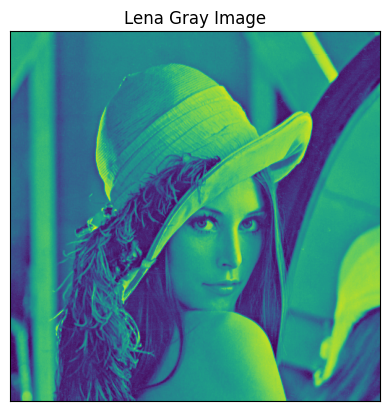

In [30]:
plt.imshow(im)
plt.xticks([])
plt.yticks([])
plt.title("Lena Gray Image")
plt.show()

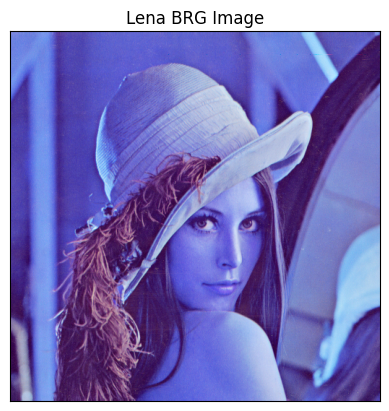

In [19]:
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title("Lena BRG Image")
plt.show()

In [22]:
img1=cv.cvtColor(img,cv.COLOR_BGR2RGB)

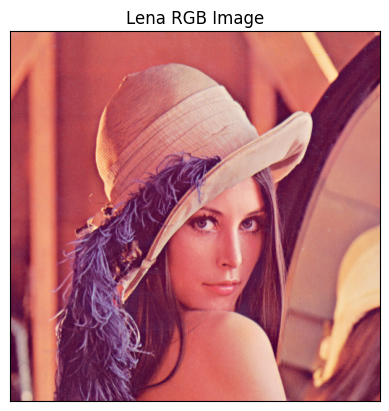

In [24]:
plt.imshow(img1)
plt.xticks([])
plt.yticks([])
plt.title("Lena RGB Image")
plt.show()

In [28]:
imvector = list(im.ravel())
gs = [x for x in range(256)]

In [29]:
fre = []
for x in gs:
    fre.append(imvector.count(x))

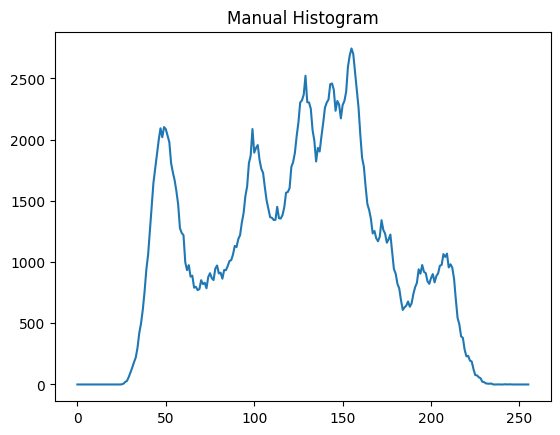

In [31]:
plt.plot(gs,fre)
plt.title("Manual Histogram")
plt.show()

In [54]:
hist = cv.calcHist([im],[0],None,[256],[0,256])

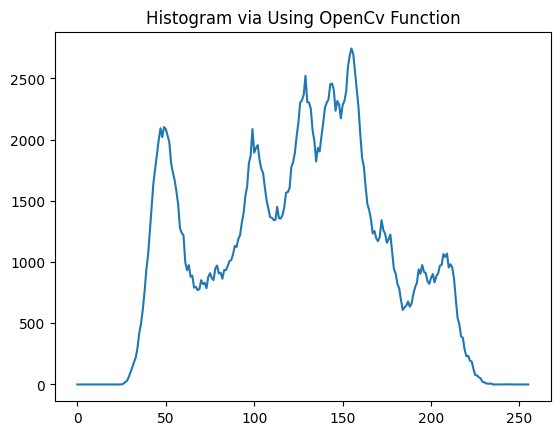

In [55]:
plt.title("Histogram via Using OpenCv Function")
plt.plot(hist)
plt.show()

In [49]:
fre1 = []
for i in range(256):
    fre1.append(fre[i]/(512*512))


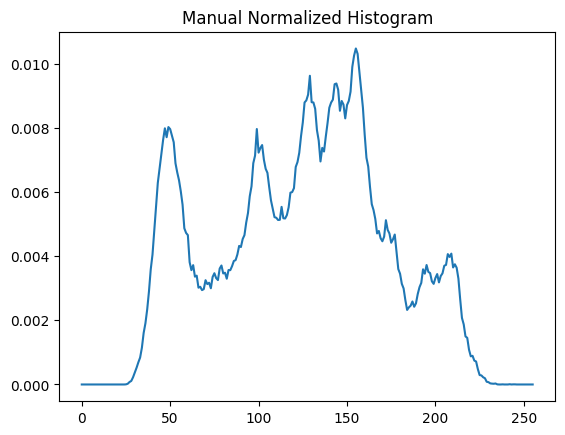

In [51]:
plt.plot(gs,fre1)
plt.title("Manual Normalized Histogram")
plt.show()

## Online

In [110]:
import cv2
import os
import numpy as np

In [111]:
def calculate_entropy(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_normalized = hist / np.sum(hist)
    entropy = -np.sum(hist_normalized * np.log2(hist_normalized + 1e-10))
    return entropy

In [112]:
image_directory = 'CoverImages'
image_list = []

In [113]:
for filename in os.listdir(image_directory):
    if filename.endswith(('.jpg', '.png', '.jpeg', '.tiff')):
        image_path = os.path.join(image_directory, filename)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        entropy_value = calculate_entropy(img)
        image_list.append((filename, entropy_value))

In [114]:
sorted_image_list = sorted(image_list, key=lambda x: x[1])

In [115]:
for filename, entropy in sorted_image_list:
    print(f'Image: {filename}, Entropy: {entropy}')

Image: tank.tiff, Entropy: 5.495739936828613
Image: airplane.tiff, Entropy: 6.702443599700928
Image: fishingboat.tiff, Entropy: 7.191370487213135
Image: house.tiff, Entropy: 7.233404159545898
Image: splash.tiff, Entropy: 7.2534027099609375
Image: baboon.tiff, Entropy: 7.358314514160156
Image: lena.tiff, Entropy: 7.445040225982666
Image: sailboat.tiff, Entropy: 7.484290599822998
Image: elaine.tiff, Entropy: 7.505983352661133
Image: peeper.tiff, Entropy: 7.593601226806641


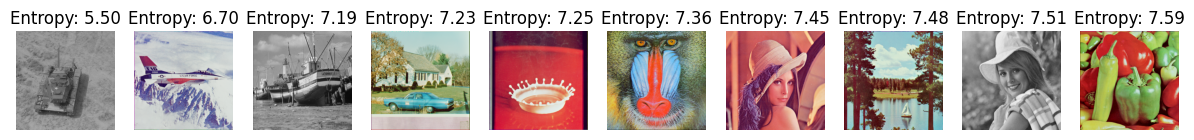

In [149]:
fig, axes = plt.subplots(1, len(sorted_image_list), figsize=(15, 5))

for i, (filename, entropy) in enumerate(sorted_image_list):
    image_path = os.path.join(image_directory, filename)
    img = cv2.imread(image_path)
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title(f'Entropy: {entropy:.2f}')

plt.show()

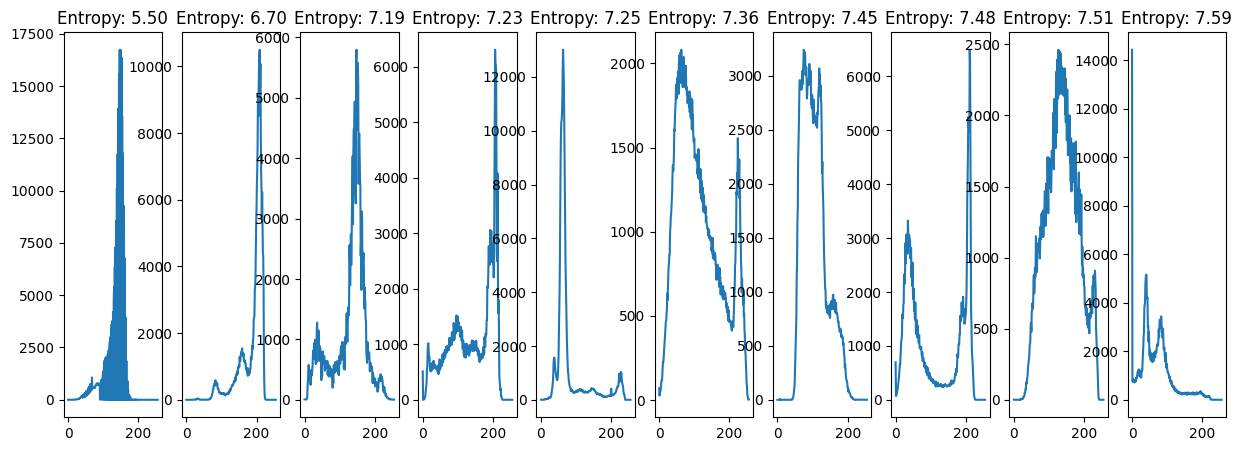

In [154]:
fig, axes = plt.subplots(1, len(sorted_image_list), figsize=(15, 5))

for i, (filename, entropy) in enumerate(sorted_image_list):
    image_path = os.path.join(image_directory, filename)
    img = cv2.imread(image_path)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    axes[i].plot(hist)
    axes[i].axis()
    axes[i].set_title(f'Entropy: {entropy:.2f}')

plt.show()

## My Entropy Function

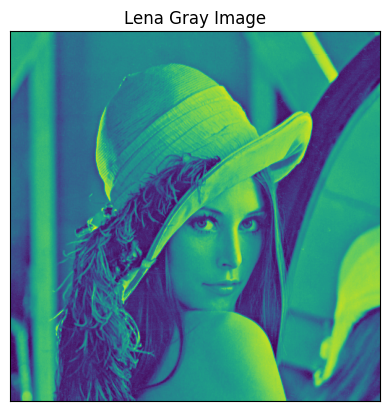

In [119]:
im = cv.imread("CoverImages\lena.tiff",0)
plt.imshow(im)
plt.xticks([])
plt.yticks([])
plt.title("Lena Gray Image")
plt.show()

In [6]:
import math as mt
def imageEntropy(p):
    h = 0.0
    for i in range(256):
        h = h + p[i]*mt.log2(p[i]+ 1e-10)
    h = -h
    return h

In [143]:
imvector = list(im.ravel())
gs = [x for x in range(256)]

In [144]:
fre = []
for x in gs:
    fre.append(imvector.count(x))

In [145]:
fre1 = []
for i in range(256):
    fre1.append(fre[i]/(512*512))

In [155]:
lenaEntropy = imageEntropy(fre1)

In [156]:
lenaEntropy

7.445040459024629

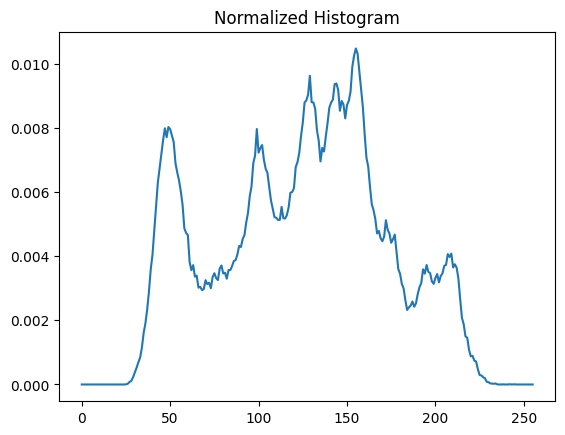

In [159]:
plt.plot(gs,fre1)
plt.title("Normalized Histogram")
plt.show()

In [2]:
image_directory = 'img3'
image_list = []

In [3]:
def calculate_entropy(im):
    imvector = list(im.ravel())
    gs = [x for x in range(256)]
    fre = []
    for x in gs:
        fre.append(imvector.count(x))
    fre1 = []
    for i in range(256):
        fre1.append(fre[i]/(512*512))
    return imageEntropy(fre1)

In [7]:
for filename in os.listdir(image_directory):
        image_path = os.path.join(image_directory, filename)
        img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        
        entropy_value = calculate_entropy(img)
        image_list.append((filename, entropy_value))

In [8]:
sorted_image_list = sorted(image_list, key=lambda x: x[1])

In [9]:
for filename, entropy in sorted_image_list:
    print(f'Image: {filename}, Entropy: {entropy}')

Image: tank.tiff, Entropy: 5.495739968979384
Image: splash.tiff, Entropy: 7.253402621764626
Image: sailboat.tiff, Entropy: 7.484290876654413


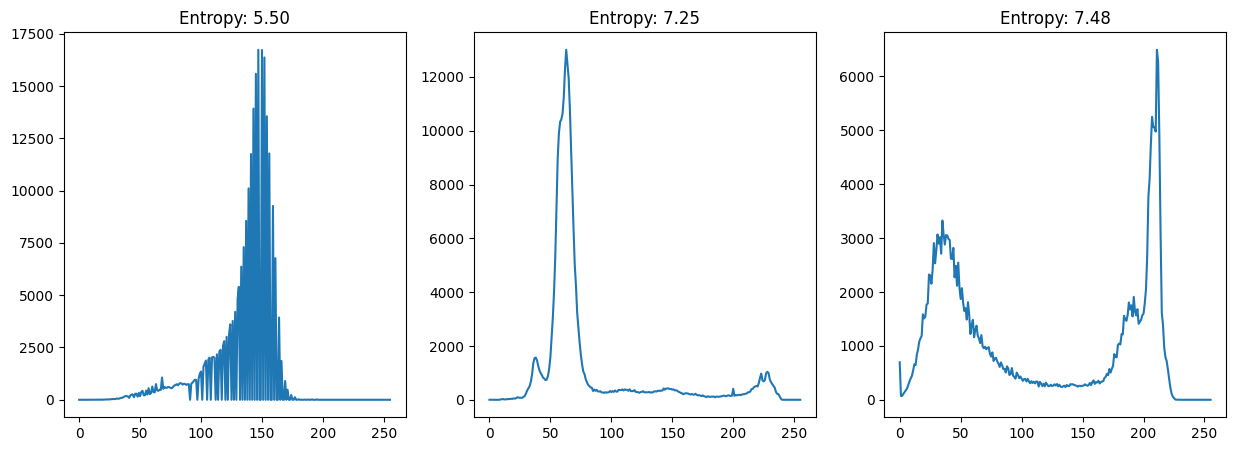

In [10]:
fig, axes = plt.subplots(1, len(sorted_image_list), figsize=(15, 5))

for i, (filename, entropy) in enumerate(sorted_image_list):
    image_path = os.path.join(image_directory, filename)
    img = cv.imread(image_path)
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    axes[i].plot(hist)
    axes[i].axis()
    axes[i].set_title(f'Entropy: {entropy:.2f}')

plt.show()

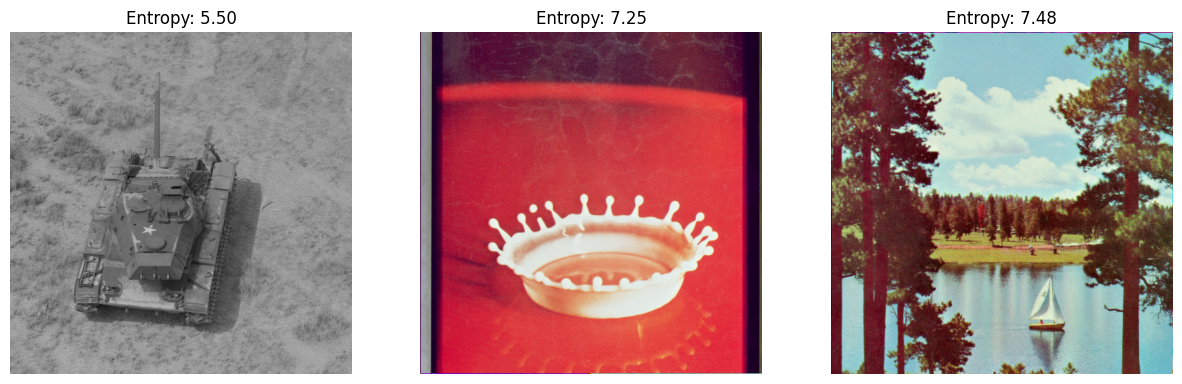

In [13]:
fig, axes = plt.subplots(1, len(sorted_image_list), figsize=(15, 5))

for i, (filename, entropy) in enumerate(sorted_image_list):
    image_path = os.path.join(image_directory, filename)
    img = cv.imread(image_path)
    axes[i].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title(f'Entropy: {entropy:.2f}')

plt.show()